En este código se pretende calcular el angulo $\theta$, que corresponde al ángulo entre el momento angular del disco $\bf{\vec{J_{d}}}$ y el momentum angular del Agujero negro $\bf{\vec{J_{bh}}}$. Se pretende determinar la posible relación del $\cos(\theta)$ con la masa del halo $M_{halo}$ y la masa del agujero negro $M_{bh}$.


In [1]:
#librerías
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gadget 
import arepo

"""
===================================
    ->Lectura de los autovectores
"""

from struct import *
import sys
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:
Sn_bh = gadget.Snapshot('../../Data/snap_015.0.hdf5', parttype=[5])


In [3]:
"""
BLACK HOLES
"""

Spin_bh=Sn_bh.BH_SpinOrientation #Spin de los black hole
r_bh = Sn_bh.Coordinates  # cordanada en x,y,z
Mass_bh = Sn_bh.BH_Mass*10e10/0.7 ## M(sun)
vel_disp_bh = Sn_bh.SubfindVelDisp  ##km/s
vel_bh = Sn_bh.Velocities ##km*sqrt(a)/s



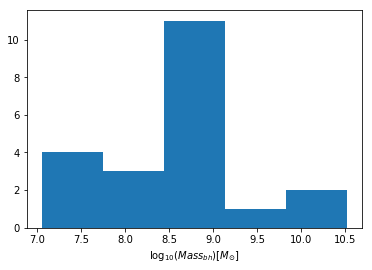

In [4]:

"""
Histograma de masa de los BH's
"""
Bines=np.int(np.sqrt(len(Mass_bh)))
#hist_Mass_halo=np.histogram(np.log10(Mass_halo), bins=17)
plt.hist(np.log10(Mass_bh),bins=5)
plt.xlabel("$\log_{10}(Mass_{bh})[M_{\odot}]$")
plt.savefig("histo_Mass_bh.png")


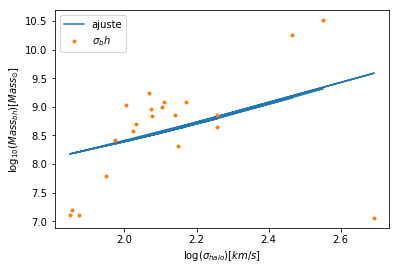

In [5]:
"""
GRAFICAS DE VERIFIVACION
    --> En esta parte del codigo se pretende
        verificar si los datos y los calculos 
        son congruentes.
"""

"""
plt.figure()
plt.plot(np.log10(vel_bh[:,0]),np.log10(Mass_bh),".")
plt.xlabel("$Vel_{bh}[km/s]$")
plt.ylabel("$\log_{10}(Mass_{bh})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_bh.png')
"""

#X_bh=np.linspace(1.8,10,10)
#Y_bh=np.linspace(7,11,10)

### ajuste dispersion de la velocidad 
def func_disp_bh(x,A,B):
    return A*x**2+B

popt, pcov = curve_fit(func_disp_bh, np.log10(vel_disp_bh),np.log10(Mass_bh))
#print(popt)

plt.figure()
#plt.plot(xdata, func(xdata, *popt), 'g--',
plt.plot(np.log10(vel_disp_bh),func_disp_bh(np.log10(vel_disp_bh), *popt), '-', label='ajuste')
plt.plot(np.log10(vel_disp_bh),np.log10(Mass_bh),".", label='$\sigma_bh$')
plt.legend()
plt.xlabel("$\log(\sigma_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{bh})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_bh.png')



In [6]:
#print(r[0])
#print(r_bh)
print(len(r_bh))

21


In [7]:
"""
INFORMACION SOBRE LOS HALOS
"""

#DataFolder= '../../Data/groups_015/'
#SnapNumber= 1


#sub = arepo.Subfind('%s/'%(DataFolder), SnapNumber ,combineFiles=True)
sub = gadget.Subfind('../../Data/groups_015/fof_subhalo_tab_015.0.hdf5' ,combineFiles=True)

In [8]:
"""
HALOS
"""
size_data = len(Mass_bh)  ##tamano de los datos

Mass_halo= sub.SubhaloMass*10e10/0.7 
vel_dis_halo = sub.SubhaloVelDisp ##km/s 
vel_max_halo = sub.SubhaloVmax  ##km/s 
spin_halo=sub.SubhaloSpin ##ckpc/h
r_halo = sub.SubhaloPos ## posicion en x,y,z ckp/h




In [9]:
print("masa_halo: ",len(Mass_halo))
print(len(Mass_bh))

#print(vel_halo)
#print(len(vel_dis_halo))


masa_halo:  104841
21


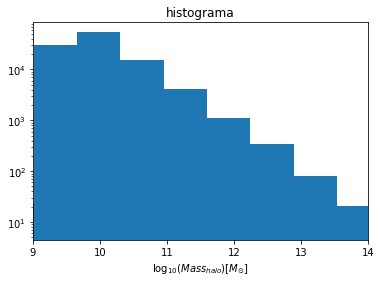

In [10]:
"""
Histograma de masa de los halos
"""
Bines=np.int(np.sqrt(len(Mass_halo)))
#hist_Mass_halo=np.histogram(np.log10(Mass_halo), bins=17)
plt.figure()
plt.hist(np.log10(Mass_halo), log=True)
plt.xlim(9,14)
plt.title("histograma")
plt.xlabel("$\log_{10}(Mass_{halo})[M_{\odot}]$")
plt.savefig("histo_Mass_halo.png")



In [11]:
print(r_halo)
print(r_halo[0,0], r_halo[0,1])

[[   631.15490723   7531.15039062   7167.41308594]
 [   653.53393555   7557.18798828   7018.20410156]
 [  1037.22912598   7595.37646484   6942.59228516]
 ..., 
 [  2563.9519043   21782.68359375   1016.04925537]
 [ 22646.73046875  23438.51757812  15435.33105469]
 [   379.62353516   6450.94335938   8510.52636719]]
631.155 7531.15


'\nplt.figure()\nplt.plot(np.log10(vel_halo[:,0]),np.log10(Mass_halo),".") ###velocidad en la direcion en X\nplt.xlabel("$\\log(vel_{halo})[km/s]$")\nplt.ylabel("$\\log_{10}(Mass_{halo})[Mass_{\\odot}]$")\nplt.savefig(\'vel_VS_mass_Halo.png\')\n'

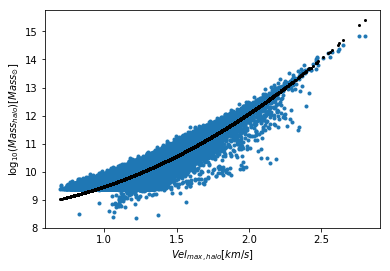

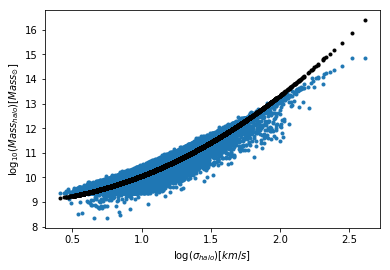

In [14]:
"""
GRAFICAS DE VERIFIVACION
    --> En esta parte del codigo se pretende
        verificar si los datos y los calculos 
        son congruentes.
"""
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3 ,figsize=(19, 5))

"""
ax1.plot(np.log10(vel_max_halo),np.log10(Mass_halo),".")
ax1.set_xlabel("$Vel_{max,halo}[km/s]$")
ax1.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_Halo.png')

ax2.plot(np.log10(vel_dis_halo),np.log10(Mass_halo),".")
ax2.set_xlabel("$\log(\sigma_{halo})[km/s]$")
ax2.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_Halo.png')

ax3.plot(np.log10(np.abs(vel_halo)),np.log10(Mass_halo),".")
ax3.set_xlabel("$\log(vel_{halo})[km/s]$")
ax3.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_VS_mass_Halo.png')
"""
#X_halo=  np.linspace(0.1, 30, num=len(r_halo) )
#Y_halo=np.linspace(9,15, len(r_halo))
#print(r_halo[0,0],r_halo[len(r_halo)-1,0])

#G = 6.67384E-11*1.9891E30*(1.0001044887813144157/3.086e19)**3 #Const Cavendish(G) = [Kpc³/(Msun*s²)]
#G= 6.67384E-11



### ajuste dispersion de la velocidad 
def f_disp_halo(x,A,B):
    return A*x**2+B

popt_disp, pcov_disp = curve_fit(f_disp_halo, np.log10(vel_dis_halo),np.log10(Mass_halo))


### ajuste velocidad max
def f_vel_max_halo(x,A,B):
    return A*x**2+B

popt_velmax, pcov_velmax = curve_fit(f_vel_max_halo, np.log10(vel_max_halo),np.log10(Mass_halo))



plt.figure()
plt.plot(np.log10(vel_max_halo),np.log10(Mass_halo),".")
#plt.plot(xdata, func(xdata, *popt), 'g--',
plt.plot(np.log10(vel_max_halo), f_vel_max_halo( np.log10(vel_max_halo), *popt_velmax ), '.k', markersize=4)
plt.xlabel("$Vel_{max,halo}[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_Halo.png')

#M=(Dist*(vel_dis_halo**2))/(G)

plt.figure()
plt.plot(np.log10(vel_dis_halo),np.log10(Mass_halo),".")
#plt.plot(xdata, func(xdata, *popt), 'g--',
plt.plot(np.log10( vel_dis_halo), f_disp_halo( np.log10(vel_dis_halo), *popt_disp), '.k')
plt.xlabel("$\log(\sigma_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_Halo.png')

"""
plt.figure()
plt.plot(np.log10(vel_halo[:,0]),np.log10(Mass_halo),".") ###velocidad en la direcion en X
plt.xlabel("$\log(vel_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_VS_mass_Halo.png')
"""



In [13]:
#Cargar los datos para 

"""
======================
Lectura de Datos 

    ---> EigenVectores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'


folder = '/home/daniel/Documentos/Tesis/Data/Tweb_512/'
file = 'snap_015.s1.00.eigenvec_2'

print("Reading eigenvector file")
f = open("%s%s"%(folder,file), "rb")
#f = open("../Bolshoi/Eigenvec_s1_1", "rb")
dumb = f.read(38)

dumb = f.read(4)
n_x = f.read(4)
n_y = f.read(4)
n_z = f.read(4)
nodes = f.read(4)
x0 = f.read(4)
y0 = f.read(4)
z0 = f.read(4)
dx = f.read(4)
dy = f.read(4)
dz = f.read(4)
dumb = f.read(4)

n_x = (unpack('i', n_x))[0]
n_y = (unpack('i', n_y))[0]
n_z = (unpack('i', n_z))[0]
nodes = (unpack('i', nodes))[0]
dx = (unpack('f', dx))[0]
dy = (unpack('f', dy))[0]
dz = (unpack('f', dz))[0]
x0 = (unpack('f', x0))[0]
y0 = (unpack('f', y0))[0]
z0 = (unpack('f', z0))[0]
print(n_x, n_y, n_z, nodes, dx, dy, dz)

total_nodes = 3 * n_x * n_y *n_z
dumb = f.read(4)
array_data = f.read(total_nodes*4)
dumb = f.read(4)
format_s = str(total_nodes)+'f'
array_data = unpack(format_s, array_data)
f.close()
array_data  = np.array(array_data)
new_array_data = np.reshape(array_data, (3,n_x,n_y,n_z), order='F')
print("--------------------\n")

#print(new_array_data[:,0,0,0])


Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
--------------------



In [14]:
###calcular los autovelores para los radios respectivos

#r=[]
#eigen_vec_r=[]
def Eigen_vec(r):
    """
    Esta funcion retorna el valor del auntoVector 
    correspondiente a las coordenadas r(x,y,z)
    """
        
    long_box= 25e3 #longitud caja
    
    dl = n_x/long_box #tamaño de cada celda = numero_celdas/long_caja
    
    i=np.int(r[0]*dl)
    j=np.int(r[1]*dl)
    k=np.int(r[2]*dl)
    
   
    

    """
    eigen_vec_r =np.array([new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]])
    """
    
    eigen_vec_r = [new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]]

   
    
    #return r[0],r[1],r[2]
    return eigen_vec_r


In [15]:
print(Eigen_vec(r_bh[5]))

[0.76648670434951782, 0.61214369535446167, 0.13041894137859344]


In [20]:
## asignacion de autovectores con su radio respectivo

Mag_EigenVec_bh=[]
Mag_EigenVec_halo=[]
Mag_Spin_bh=[]
Mag_Spin_halo=[]
Dot_bh=[]
Dot_halo=[]
EigenVec_bh=[]
EigenVec_halo=[]
cos_theta_bh=[]
cos_theta_halo=[]

for i in range(len(r_bh)):
    
    #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])
    #New_enviroment=reshape(Enviroment,(1,n_x))
    EigenVec_bh.append(Eigen_vec(r_bh[i]))
        
    Mag_EigenVec_bh.append(np.linalg.norm(EigenVec_bh[i])) ##magnitud del autovector
    
    Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
        
    Dot_bh.append(np.vdot(EigenVec_bh[i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
        
    cos_theta_bh.append(Dot_bh[i]/(Mag_EigenVec_bh[i]*Mag_Spin_bh[i])) 
    
"""
for i in range(len(r_halo)):
    
    EigenVec_halo.append(Eigen_vec(r_halo[i]))
    Mag_EigenVec_halo.append(np.linalg.norm(EigenVec_halo[i])) ##magnitud del autovector
    Mag_Spin_halo.append(np.linalg.norm(spin_halo[i]))       ##magnitud del Spin_bh
    Dot_halo.append(np.vdot(EigenVec_halo[i],spin_halo[i]))      ##Productopunto del autovec y spin_bh
    cos_theta_halo.append(Dot_halo[i]/(Mag_EigenVec_halo[i]*Mag_Spin_halo[i])) 
"""

#print(Mag_Enviroment[0])    

print("cos(teta)",cos_theta_bh)
#cos_theta_bh1 = np.reshape(cos_theta_bh,(3,len(r_bh)))
#print("cos(teta)",cos_theta_bh1)

cos(teta) [-0.59524585506386452, 0.32736780499693302, 0.24034314593317588, -0.94598606706776478, -0.92225042816595471, -0.23711030985211087, -0.33039487531469425, 0.07157255147975429, 0.56329268481215788, -0.76751610504664658, 0.96103363467724812, -0.36240484769421727, -0.35220795434643237, 0.04369446168976366, -0.21002709005960726, -0.56960622604998168, -0.11177151136861672, -0.35225908328018146, -0.21821285951513017, 0.26661092208286724, -0.047961013553621847]


"\nplt.figure()\nplt.plot(np.log10(Mass_halo),cos_theta_bh,'.')\nplt.xlabel('$\\log_{10}(M_{bh})[M_{\\odot}]$')\nplt.ylabel('$\\cos( \\Theta ) $')\nplt.savefig('Alinacion_Enviroment_halo.png')\n"

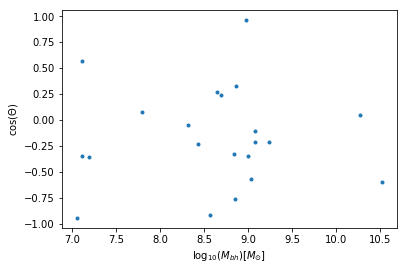

In [22]:
plt.figure()
plt.plot(np.log10(Mass_bh),cos_theta_bh,'.')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.savefig('Alinacion_Enviroment_bh.png')
"""
plt.figure()
plt.plot(np.log10(Mass_halo),cos_theta_bh,'.')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.savefig('Alinacion_Enviroment_halo.png')
"""

In [23]:
print(r_bh)
print(r_halo[:len(r_bh)])

[[  631.28878196  7531.14490752  7167.51987284]
 [  663.85491272  7542.56652565  7138.94906246]
 [  690.30428576  7601.26662394  6818.69049836]
 [  425.63533352  7639.22267624  6806.7480046 ]
 [  906.20003826  7640.45772474  6935.2736818 ]
 [  646.87401608  6998.73256069  7394.17057261]
 [  993.93650611  8200.26887895  6837.61417368]
 [  484.42259957  7867.15041299  6365.62227952]
 [  281.81428513  7482.65211167  7506.03267541]
 [  744.4964462   8051.67639877  6365.48292827]
 [  406.18510836  7730.22179106  6751.77854405]
 [  638.52256114  8112.48247954  6252.38316511]
 [  201.31828569  8079.92652723  6059.52221224]
 [  653.51106685  7557.26593193  7018.22729886]
 [  628.24215653  7222.33181589  7523.21209613]
 [  538.3977704   8201.9072569   6213.72378394]
 [  534.99639846  7149.22314623  7463.37354229]
 [  478.91777964  7324.75959922  7289.44445413]
 [ 1083.81102254  7610.6963017   6916.38923702]
 [  598.79040757  7662.73409361  7020.10701189]
 [  553.96096948  7544.69554732  7023.72

In [24]:
R=[]
Rmin=[]
rmin=[]

"""
for i in range(len(r_bh)):
    r_min=r_bh[0]-r_halo[i]
    for j in range(1,len(r_halo)):
        dist = r_bh[i]-r_halo[j]
        if (dist <= r_min):
            Mass_halo = sub.SubhaloMass*10e10/0.7 
"""
    
kk=0    
d_halo= []
d_bh = []


for i in range(len(r_bh)):
    x2_bh =r_bh[i][0]*r_bh[i][0]
    y2_bh=r_bh[i][1]*r_bh[i][1]
    z2_bh=r_bh[i][2]*r_bh[i][2]
    x_bh =r_bh[i][0]
    y_bh =r_bh[i][1]
    z_bh =r_bh[i][2]
    
    
    d_bh.append(np.sqrt(x2_bh + y2_bh + z2_bh)) #distancia para cada bh


    
for i in range(len(r_halo)):
    x2_halo =r_halo[i][0]*r_halo[i][0]
    y2_halo=r_halo[i][1]*r_halo[i][1]
    z2_halo=r_halo[i][2]*r_halo[i][2]
    x_halo =r_halo[i][0]
    y_halo =r_halo[i][1]
    z_halo =r_halo[i][2]
    #print(x2_halo)    
    
    d_halo.append(np.sqrt(x2_halo + y2_halo + z2_halo)) #distancia para cada halo
#print(d_halo)

Mass_halo_new = []
vel_dis_halo_new = [] ##km/s 
vel_max_halo_new =[]
spin_halo_new=[]
r_halo_new = []
    

    
for k in range(len(r_bh)):
    R=[]
    
    x_bh =r_bh[k][0]
    y_bh =r_bh[k][1]
    z_bh =r_bh[k][2]
    
    for j in range(len(r_halo)):
        x_halo =r_halo[j][0]
        y_halo =r_halo[j][1]
        z_halo =r_halo[j][2]
        
        #R.append(np.abs(d_bh[k]-d_halo[j]))
        R.append(np.sqrt((x_bh-x_halo)**2 + (y_bh-y_halo)**2 +(z_bh-z_halo)**2))
        
    id=np.argmin(R)
    print(id)
    
    Mass_halo_new.append(sub.SubhaloMass[id])
    vel_dis_halo_new.append(sub.SubhaloVelDisp[id]) ##km/s 
    vel_max_halo_new.append(sub.SubhaloVmax[id])  ##km/s 
    spin_halo_new.append(sub.SubhaloSpin[id]) ##ckpc/h
    r_halo_new.append(sub.SubhaloPos[id]) ## posicion en x,y,z ckp/h

Mass_halo_new=np.reshape(Mass_halo_new,(len(r_bh),1))
r_halo_new=np.reshape(r_halo_new,(len(r_bh),3))
vel_dis_halo_new=np.reshape(vel_dis_halo_new,(len(r_bh),1))
vel_max_halo_new=np.reshape(vel_max_halo_new,(len(r_bh),1))
spin_halo_new=np.reshape(spin_halo_new,(len(r_bh),3))

print("------------")
print(len(R))
print(len(Mass_halo))
print("------------")
#print(r_bh)
#print(r_halo_new)



0
19
25
253
18
24
11
17
37
6
13
28
32
1
3
4
7
8
10
14
15
------------
104841
104841
------------


In [25]:
print(r_bh[:,0])
print(r_halo_new[:,0])
#print(r_halo)

[  631.28878196   663.85491272   690.30428576   425.63533352   906.20003826
   646.87401608   993.93650611   484.42259957   281.81428513   744.4964462
   406.18510836   638.52256114   201.31828569   653.51106685   628.24215653
   538.3977704    534.99639846   478.91777964  1083.81102254   598.79040757
   553.96096948]
[  631.15490723   664.11212158   690.23376465   408.28833008   906.30072021
   646.8369751    993.95300293   484.42260742   281.6925354    745.43597412
   406.14355469   638.56842041   200.93222046   653.53393555   628.2243042
   538.28143311   535.06951904   478.91650391  1083.95068359   598.84503174
   553.80163574]


NameError: name 'r_halo_new' is not defined

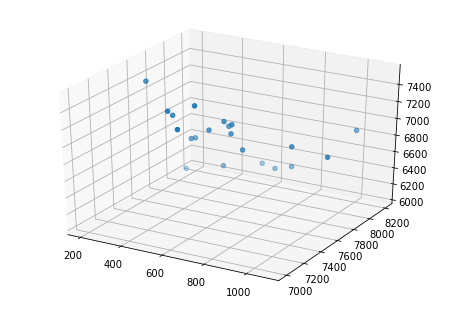

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(r_bh[:,0], r_bh[:,1], r_bh[:,2],  label="bh")
ax.scatter(r_halo_new[:,0], r_halo_new[:,1], r_halo_new[:,2], label="halo")
ax.legend()
ax.view_init(elev=15., azim=10)
plt.savefig("kk")
#ax.scatter?

In [31]:
"""
HALOS
"""
"""
size_data = len(Mass_bh)  ##tamano de los datos

Mass_halo= sub.SubhaloMass[:size_data]*10e10/0.7 
vel_dis_halo = sub.SubhaloVelDisp[:size_data] ##km/s 
vel_max_halo = sub.SubhaloVmax[:size_data]  ##km/s 
spin_halo=sub.SubhaloSpin[:size_data] ##ckpc/h
r_halo = sub.SubhaloPos[:size_data] ## posicion en x,y,z ckp/h
"""

'\nsize_data = len(Mass_bh)  ##tamano de los datos\n\nMass_halo= sub.SubhaloMass[:size_data]*10e10/0.7 \nvel_dis_halo = sub.SubhaloVelDisp[:size_data] ##km/s \nvel_max_halo = sub.SubhaloVmax[:size_data]  ##km/s \nspin_halo=sub.SubhaloSpin[:size_data] ##ckpc/h\nr_halo = sub.SubhaloPos[:size_data] ## posicion en x,y,z ckp/h\n'

In [32]:
#r_halo_new=np.reshape(r_halo,(len(r_bh),3))



In [33]:
"""
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(r_bh[:,0], r_bh[:,1], r_bh[:,2])
ax.scatter(r_halo[:,0], r_halo[:,1], r_halo[:,2])
ax.view_init(elev=90., azim=None)
"""


'\nfrom mpl_toolkits.mplot3d import Axes3D\n\nfig = pyplot.figure()\nax = Axes3D(fig)\n\nax.scatter(r_bh[:,0], r_bh[:,1], r_bh[:,2])\nax.scatter(r_halo[:,0], r_halo[:,1], r_halo[:,2])\nax.view_init(elev=90., azim=None)\n'

In [ ]:
scatter?

In [ ]:
open?